In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

# Graph Force/Strain

### Dimensions

In [7]:
Lext = 200e-3
Lin = 126.8e-3
a = (Lext-Lin)/2
steel = {'w':50.05e-3,'h': 10.19e-3}
Al = {'w':50.07e-3,'h': 5.02e-3}
Cu = {'w':50.10e-3,'h': 8.12e-3}
Comp = {'w':53.37e-3,'h': 4.54e-3}

steel['I'] = steel['w']*steel['h']**3/12
Al['I'] = Al['w']*Al['h']**3/12
Cu['I'] = Cu['w']*Cu['h']**3/12
Comp['I'] = Comp['w']*Comp['h']**3/12

### Bending test data

In [8]:
def decode(a):
    b=a
    if a[0] == '-':
        base = -(int(b[1])+int(b[3])/10+int(b[4])/100)
        b = b[1:]
    else:
        base = int(b[0])+int(b[2])/10+int(b[3])/100
    exp=0
    if b[5]=='-':
        exp = -(int(b[6])*10+ int(b[7]))
    elif b[5]=='+':
        exp = int(b[6])*10+ int(b[7])
    return base*10**(exp)

def average(arr):
    it = 0
    moy = 0
    l = int(len(arr)*.02)
    ar = np.sort(arr)[l:len(arr)-l]
    for i in range(len(ar)):
        if ar[i]!=0:
            moy += ar[i]
            it += 1
    return moy/it

In [9]:
data_steel = np.loadtxt('Steel.txt',skiprows=3,delimiter=';',usecols=(0,1,2),max_rows=3307,dtype=str) 
data_Al = np.loadtxt('Aluminium.txt',skiprows=3,delimiter=';',usecols=(0,1,2),max_rows=1040,dtype=str)
data_Cu = np.loadtxt('Copper.txt',skiprows=3,delimiter=';',usecols=(0,1,2),max_rows=1105,dtype=str)
data_Comp = np.loadtxt('Composite.txt',skiprows=3,delimiter=';',usecols=(0,1,2),max_rows=591,dtype=str)

In [10]:
steel['data'] = np.zeros_like(data_steel,dtype=float)
Al['data'] = np.zeros_like(data_Al,dtype=float)
Cu['data'] = np.zeros_like(data_Cu,dtype=float)
Comp['data'] = np.zeros_like(data_Comp,dtype=float)
steel['smax'] = np.zeros(len(steel['data']))
Al['smax'] = np.zeros(len(Al['data']))
Cu['smax'] = np.zeros(len(Cu['data']))
Comp['smax'] = np.zeros(len(Comp['data']))

E_steel = np.zeros(len(steel['data']))
E_Al = np.zeros(len(Al['data']))
E_Cu = np.zeros(len(Cu['data']))
E_Comp = np.zeros(len(Comp['data']))

for i in range(len(steel['data'])):
    for j in range(len(steel['data'][0])):
        steel['data'][i,j] = decode(data_steel[i,j])
    steel['smax'][i] = 3*steel['data'][i,2]/(steel['w']*steel['h']**2)
    if steel['data'][i,0] != 0:
        E_steel[i] = steel['data'][i,2]*Lext**3/(48*steel['I']*steel['data'][i,0]*10**(-3))*(3*a/Lext-4*a**3/(Lext**3))    
steel['E'] = average(E_steel)

for i in range(len(Al['data'])):
    for j in range(len(Al['data'][0])):
        Al['data'][i,j] = decode(data_Al[i,j])
    Al['smax'][i] = 3*Al['data'][i,2]/(Al['w']*Al['h']**2)
    if Al['data'][i,0] != 0:
        E_Al[i] = Al['data'][i,2]*Lext**3/(48*Al['I']*Al['data'][i,0]*10**(-3))*(3*a/Lext-4*(a/Lext)**3)   
Al['E'] = average(E_Al)

for i in range(len(Cu['data'])):
    for j in range(len(Cu['data'][0])):
        Cu['data'][i,j] = decode(data_Cu[i,j])
    Cu['smax'][i] = 3*Cu['data'][i,2]/(Cu['w']*Cu['h']**2)
    if Cu['data'][i,0] != 0:
        E_Cu[i] = Cu['data'][i,2]*Lext**3/(48*Cu['I']*Cu['data'][i,0]*10**(-3))*(3*a/Lext-4*(a/Lext)**3)
        
Cu['E'] = average(E_Cu)

for i in range(len(Comp['data'])):
    for j in range(len(Comp['data'][0])):
        Comp['data'][i,j] = decode(data_Comp[i,j])
    Comp['smax'][i] = 3*Comp['data'][i,2]/(Comp['w']*Comp['h']**2)
    if Comp['data'][i,0] != 0:
        E_Comp[i] = Comp['data'][i,2]*Lext**3/(48*Comp['I']*Comp['data'][i,0]*10**(-3))*(3*a/Lext-4*(a/Lext)**3)
Comp['E'] = average(E_Comp)

print('{:.3e}'.format(steel['E']))
print('{:.3e}'.format(Al['E']))
print('{:.3e}'.format(Cu['E']))
print('{:.3e}'.format(Comp['E']))


2.072e+11
8.174e+10
1.195e+11
6.305e+10


## Plot

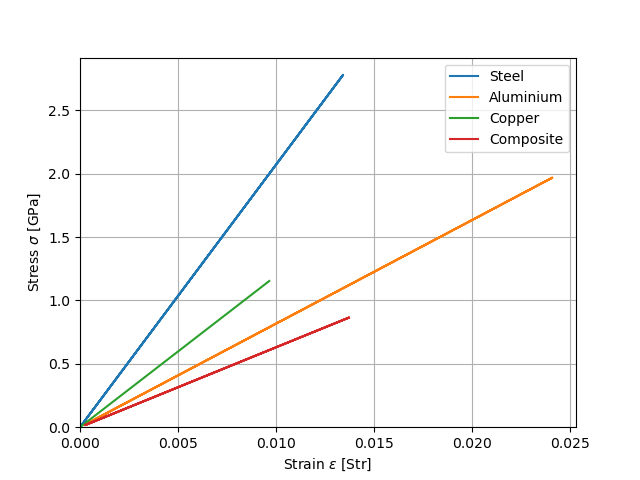

In [11]:
fig = plt.figure()
ax = fig.gca()
ax.plot(steel['smax']/steel['E'],steel['smax']/10**9,label='Steel')
ax.plot(Al['smax']/Al['E'],Al['smax']/10**9,label='Aluminium')
ax.plot(Cu['smax']/Cu['E'],Cu['smax']/10**9,label='Copper')
ax.plot(Comp['smax']/Comp['E'],Comp['smax']/10**9,label='Composite')

ax.legend()
ax.grid()
ax.set_xlabel('Strain $\epsilon$ [Str]')
ax.set_ylabel('Stress $\sigma$ [GPa]')
ax.set_xlim(0)
ax.set_ylim(0)
plt.show()





